In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('new_online_retail.csv')
df['TotalSpent']= df.UnitPrice*df.Quantity

#divide the dataset by time
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalSpent     float64
dtype: object

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
#some data viz
best_country = df.groupby(['CustomerID','Country'])[['TotalSpent']].sum()
best_country = best_country.sort_values('TotalSpent',ascending=False).head(10)
top_sold1= df.groupby('Description')[['Quantity']].sum()
top_sold1 =top_sold1.sort_values('Quantity',ascending=False).head(10)
top_sold1_money = df.groupby('Description')[['TotalSpent']].sum()
top_sold1_money = top_sold1_money.sort_values('TotalSpent',ascending=False).head(10)
#top_sold_product_in_country

                                    TotalSpent
Description                                   
DOTCOM POSTAGE                       206245.48
REGENCY CAKESTAND 3 TIER             164762.19
WHITE HANGING HEART T-LIGHT HOLDER    99668.47
PARTY BUNTING                         98302.98
JUMBO BAG RED RETROSPOT               92356.03
RABBIT NIGHT LIGHT                    66756.59
POSTAGE                               66230.64
PAPER CHAIN KIT 50'S CHRISTMAS        63791.94
ASSORTED COLOUR BIRD ORNAMENT         58959.73
CHILLI LIGHTS                         53768.06


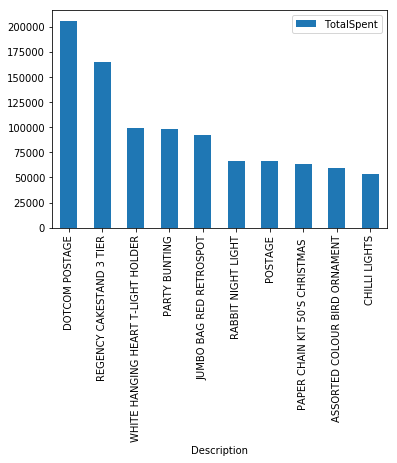

In [5]:
top_sold1_money.plot(kind='bar')

print(top_sold1_money)

In [6]:
round(top_sold1/top_sold1.sum()*100)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,15.0
JUMBO BAG RED RETROSPOT,13.0
ASSORTED COLOUR BIRD ORNAMENT,10.0
POPCORN HOLDER,10.0
PACK OF 72 RETROSPOT CAKE CASES,10.0
WHITE HANGING HEART T-LIGHT HOLDER,10.0
RABBIT NIGHT LIGHT,9.0
MINI PAINT SET VINTAGE,7.0
PACK OF 12 LONDON TISSUES,7.0


In [7]:
#best_country.plot(kind= 'bar')
print(best_country)

                           TotalSpent
CustomerID Country                   
14646.0    Netherlands      279489.02
18102.0    United Kingdom   256438.49
17450.0    United Kingdom   187482.17
14911.0    EIRE             132572.62
12415.0    Australia        123725.45
14156.0    EIRE             113384.14
17511.0    United Kingdom    88125.38
16684.0    United Kingdom    65892.08
13694.0    United Kingdom    62653.10
15311.0    United Kingdom    59419.34


In [8]:
#p['perc']= p['score']/p['score'].sum()
best_country_customer_percent = best_country/best_country.sum()
best_country_customer_percent = best_country_customer_percent
best_country_customer_percent

,,TotalSpent
CustomerID,Country,
14646.0,Netherlands,0.204128
18102.0,United Kingdom,0.187293
17450.0,United Kingdom,0.136930
14911.0,EIRE,0.096826
12415.0,Australia,0.090365
14156.0,EIRE,0.082812
17511.0,United Kingdom,0.064364
16684.0,United Kingdom,0.048125
13694.0,United Kingdom,0.045760


In [9]:
top_country = df.groupby('Country')[['TotalSpent']].sum()
top_country_percent= top_country/top_country.sum()*100
#top_country_percent=top_country_percent*100
top_country_percent = top_country_percent.sort_values('TotalSpent',ascending=False).head(10)
top_country_percent

,TotalSpent
Country,
United Kingdom,83.996903
Netherlands,2.920280
EIRE,2.700899
Germany,2.274353
France,2.025123
Australia,1.406246
Switzerland,0.578445
Spain,0.561920
Belgium,0.419697


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSpent     0
dtype: int64

In [12]:
df['new_date'] = pd.to_datetime(df['InvoiceDate'])
df['weekday'] = df.new_date.dt.weekday_name#, errors='coerce'
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df['new_date']])
df = df.assign(new_date=new_dates, new_time=new_times)
df['DateTime'] = pd.to_datetime(df['new_date'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,new_date,weekday,new_time,DateTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,Wednesday,08:26:00,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,08:26:00,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,Wednesday,08:26:00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,08:26:00,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,08:26:00,2010-12-01


In [13]:
# Create 3 new columns
#df[['year','month','day']] = df.new_date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

#df.head()
best_weekday = df.groupby('weekday')


In [23]:
best_weekday = pd.Categorical(best_weekday, categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Sunday'],
    ordered=True)


[NaN]
Categories (6, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Sunday]

           TotalSpent
weekday              
Friday      1241316.0
Monday      1274552.0
Sunday       784419.0
Thursday    1906108.0
Tuesday     1563194.0
Wednesday   1530477.0


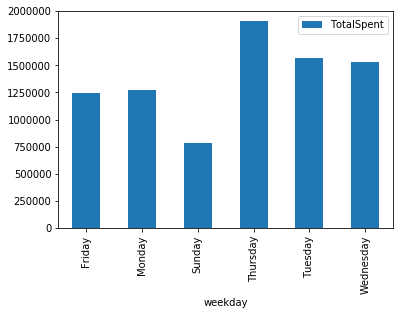

In [24]:
best_weekday = df.groupby('weekday')[['TotalSpent']].sum()
print(round(best_weekday))
best_weekday.plot(kind='bar')


In [25]:
best_weekday_percent = best_weekday/best_weekday.sum()
best_weekday_percent = best_weekday_percent * 100
best_weekday_percent = round(best_weekday_percent)
best_weekday_percent

,TotalSpent
weekday,
Friday,15.0
Monday,15.0
Sunday,9.0
Thursday,23.0
Tuesday,19.0
Wednesday,18.0


In [26]:
a = pd.DataFrame(top_sold1)
b= pd.DataFrame(top_sold1_money)
c= pd.DataFrame(best_weekday)
d = pd.DataFrame(best_country)
e = pd.DataFrame(top_country_percent)
f = pd.DataFrame(best_country_customer_percent)
g = pd.DataFrame(best_weekday_percent)
pdList = [a,b,c,d,e,f,g]
data_for_viz = pd.concat(pdList) 
data_for_viz

/home/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,Quantity,TotalSpent
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847.0,NaN
JUMBO BAG RED RETROSPOT,47363.0,NaN
ASSORTED COLOUR BIRD ORNAMENT,36381.0,NaN
POPCORN HOLDER,36334.0,NaN
PACK OF 72 RETROSPOT CAKE CASES,36039.0,NaN
WHITE HANGING HEART T-LIGHT HOLDER,35317.0,NaN
RABBIT NIGHT LIGHT,30680.0,NaN
MINI PAINT SET VINTAGE,26437.0,NaN
PACK OF 12 LONDON TISSUES,26315.0,NaN
PACK OF 60 PINK PAISLEY CAKE CASES,24753.0,NaN


In [27]:
# Finding max data
maximum = max(df.DateTime)
maximum

Timestamp('2011-12-09 00:00:00')

In [28]:
maximum = maximum + pd.DateOffset(days = 1)
maximum

Timestamp('2011-12-10 00:00:00')

In [29]:
df['diff'] = maximum - df.DateTime
df['diff']= df['diff'].dt.days

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,new_date,weekday,new_time,DateTime,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,Wednesday,08:26:00,2010-12-01,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,08:26:00,2010-12-01,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,Wednesday,08:26:00,2010-12-01,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,08:26:00,2010-12-01,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,08:26:00,2010-12-01,374


In [31]:
recency = df.groupby('CustomerID').diff.min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [32]:
monetary = df.groupby(['CustomerID'])[['TotalSpent']].sum()
monetary.head()

,TotalSpent
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [33]:
#Frequency function

# Getting the count of orders made by each customer based on customer ID.
frequency = df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [34]:
data_full = monetary.merge(frequency, on = "CustomerID", how = "inner")
data_full =data_full.merge(recency, on ='CustomerID',how ='inner').reset_index()
data_full.head()

,index,CustomerID,TotalSpent,InvoiceNo,diff
0,0,12346.0,0.00,2,326
1,1,12347.0,4310.00,182,3
2,2,12348.0,1797.24,31,76
3,3,12349.0,1757.55,73,19
4,4,12350.0,334.40,17,311


In [35]:
quantiles = data_full.quantile(q=[0.25,0.5,0.75])
quantiles

,index,CustomerID,TotalSpent,InvoiceNo,diff
0.25,1092.75,13812.75,293.3625,17.0,17.0
0.50,2185.50,15300.50,648.0750,42.0,51.0
0.75,3278.25,16778.25,1611.7250,102.0,144.0


In [36]:
quantiles.to_dict()


{'index': {0.25: 1092.75, 0.5: 2185.5, 0.75: 3278.25},
 'CustomerID': {0.25: 13812.75, 0.5: 15300.5, 0.75: 16778.25},
 'TotalSpent': {0.25: 293.36250000000007,
  0.5: 648.0750000000002,
  0.75: 1611.7249999999995},
 'InvoiceNo': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'diff': {0.25: 17.0, 0.5: 51.0, 0.75: 144.0}}

In [37]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [38]:
#create rfm segmentation table
rfm_segmentation = data_full
rfm_segmentation['R_Quartile'] = data_full['diff'].apply(RScore, args=('diff',quantiles,))
rfm_segmentation['F_Quartile'] = data_full['InvoiceNo'].apply(FMScore, args=('InvoiceNo',quantiles,))
rfm_segmentation['M_Quartile'] = data_full['TotalSpent'].apply(FMScore, args=('TotalSpent',quantiles,))
rfm_segmentation.head()

,index,CustomerID,TotalSpent,InvoiceNo,diff,R_Quartile,F_Quartile,M_Quartile
0,0,12346.0,0.00,2,326,1,1,1
1,1,12347.0,4310.00,182,3,4,4,4
2,2,12348.0,1797.24,31,76,2,2,4
3,3,12349.0,1757.55,73,19,3,3,4
4,4,12350.0,334.40,17,311,1,1,2


In [39]:

rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()



,index,CustomerID,TotalSpent,InvoiceNo,diff,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0,0,12346.0,0.00,2,326,1,1,1,111
1,1,12347.0,4310.00,182,3,4,4,4,444
2,2,12348.0,1797.24,31,76,2,2,4,224
3,3,12349.0,1757.55,73,19,3,3,4,334
4,4,12350.0,334.40,17,311,1,1,2,112


In [40]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='111']))

Best Customers:  458
Loyal Customers:  1081
Big Spenders:  1093
Almost Lost:  102
Lost Customers:  19
Lost Cheap Customers:  391


In [41]:
Best_Customers = len(rfm_segmentation[rfm_segmentation['RFM_Score']=='444'])
Loyal_Customers = len(rfm_segmentation[rfm_segmentation['F_Quartile']==4])
Big_Spenders = len(rfm_segmentation[rfm_segmentation['M_Quartile']==4])
Almost_Lost = len(rfm_segmentation[rfm_segmentation['RFM_Score']=='244'])
Lost_Customers = len(rfm_segmentation[rfm_segmentation['RFM_Score']=='144'])
Lost_Cheap_Customers = len(rfm_segmentation[rfm_segmentation['RFM_Score']=='111'])
all_customer = Best_Customers+Loyal_Customers+Lost_Customers+Lost_Cheap_Customers+Almost_Lost+Big_Spenders
Alm = rfm_segmentation[rfm_segmentation['RFM_Score']=='244'].sort_values('diff', ascending=False)
Rapid_miner_df = pd.DataFrame(Alm)

In [42]:
Best_Customers_perc = round(Best_Customers / all_customer*100)
Loyal_Customers_perc = round(Loyal_Customers / all_customer*100)
Big_Spenders_perc = round(Big_Spenders / all_customer*100)
Almost_Lost_perc = round(Almost_Lost/all_customer*100)
Lost_Customers_perc = round(Lost_Customers/all_customer*100)
Lost_Cheap_Customers_perc= round(Lost_Cheap_Customers/all_customer*100)

In [43]:
Rapid_miner_df.to_csv('ML prova online retail2.csv', sep='\t')#, encoding='utf-8')

In [44]:
print(Best_Customers_perc,Loyal_Customers_perc,Big_Spenders_perc,Almost_Lost_perc,Lost_Cheap_Customers_perc,Lost_Customers_perc)

15 34 35 3 12 1


In [45]:
data = pd.DataFrame({'Best_Customers':[Best_Customers],'Loyal_Customers':[Loyal_Customers],'Big_Spenders':[Big_Spenders],'Almost_Lost':[Almost_Lost],'Lost_Customers':[Lost_Customers],'Lost_Cheap_Customers':[Lost_Cheap_Customers]})
data

,Best_Customers,Loyal_Customers,Big_Spenders,Almost_Lost,Lost_Customers,Lost_Cheap_Customers
0,458,1081,1093,102,19,391


In [46]:
data1 = pd.DataFrame({'Best_Customers':[Best_Customers_perc],'Loyal_Customers':[Loyal_Customers_perc],'Big_Spenders':[Big_Spenders_perc],'Almost_Lost':[Almost_Lost_perc],'Lost_Customers':[Lost_Customers_perc],'Lost_Cheap_Customers':[Lost_Cheap_Customers_perc]})
data1

,Best_Customers,Loyal_Customers,Big_Spenders,Almost_Lost,Lost_Customers,Lost_Cheap_Customers
0,15,34,35,3,1,12


In [47]:
rfm_segmentation[rfm_segmentation['RFM_Score']=='444'].sort_values('TotalSpent', ascending=False).head(10)

,index,CustomerID,TotalSpent,InvoiceNo,diff,R_Quartile,F_Quartile,M_Quartile,RFM_Score
1703,1703,14646.0,279489.02,2085,2,4,4,4,444
4233,4233,18102.0,256438.49,433,1,4,4,4,444
3758,3758,17450.0,187482.17,351,9,4,4,4,444
1895,1895,14911.0,132572.62,5903,2,4,4,4,444
1345,1345,14156.0,113384.14,1420,10,4,4,4,444
3801,3801,17511.0,88125.38,1076,3,4,4,4,444
3202,3202,16684.0,65892.08,281,5,4,4,4,444
1005,1005,13694.0,62653.10,585,4,4,4,4,444
2192,2192,15311.0,59419.34,2491,1,4,4,4,444
568,568,13089.0,57385.88,1857,3,4,4,4,444


In [132]:
#data = data1

#datatoexcel = pd.ExcelWriter("RFM_seg_per.xlsx", engine='xlsxwriter')

#data.to_excel(datatoexcel, sheet_name="Sheet1")

#datatoexcel.save()